---
# Práctica 3. Creación de un sistema difuso.
---

Partiendo de las 2 prácticas anteriores, cada uno tendréis que crear un sistema difuso, que permita hacer la inferencia tanto por Takagi como por Mamdani (los resultados no tienen por que ser necesariamente los mismos).

Para ello, vamos a hacer un sistema que nos permita fichar a un jugador de baloncesto teniendo en cuenta dos variables:
- Altura
- Porcentaje de tiros a canasta

In [1]:
from simpful import *

In [2]:
inference_method = "takagi" # Valores posibles. "takagi" o "mamdani"

In [3]:
sis_baloncesto = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.10.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [4]:
# Creación del conjunto difuso para la variable de entrada 'altura'

Para la estatura (cm) manejaremos los siguientes rangos:
- Muy bajo : [0,160]
- Bajo: [150,180]
- Normal: [175,195]
- Alto: [187,215]
- Muy alto: [210, 250]

In [5]:
Al1 = FuzzySet(function=Trapezoidal_MF(a=0, b=150, c=150 ,d=160), term="muy_bajo")
Al2 = FuzzySet(function=Trapezoidal_MF(a=150, b=160, c=175,d=180), term="bajo")
Al3 = FuzzySet(function=Trapezoidal_MF(a=175, b=180, c=187,d=195), term="normal")
Al4 = FuzzySet(function=Trapezoidal_MF(a=187, b=195, c=210,d=215), term="alto")
Al5 = FuzzySet(function=Trapezoidal_MF(a=210, b=215, c=250,d=250), term="muyalto")

# Definimos los extremos entre los que está la variable lingüística.
rango_al = [0,250]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso
lv_al = LinguisticVariable([Al1, Al2, Al3, Al4, Al5], concept="Altura del jugador", universe_of_discourse=rango_al)
sis_baloncesto.add_linguistic_variable("Altura", lv_al)

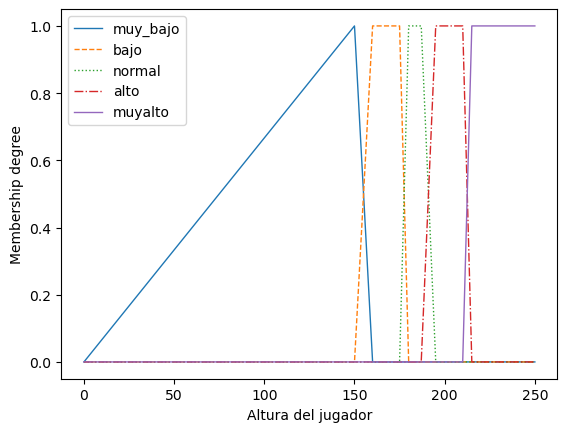

In [6]:
sis_baloncesto.plot_variable("Altura")

Para el porcentaje de tiro, manejaremos los siguientes rangos (de 0 a 100):
- Muy malo: [0,30]
- Malo: [25,40]
- Aceptable: [35,70]
- Alto: [65,85]
- Muy alto: [80,100]

In [7]:
# Crear el conjunto difuso cuya variable lingüística llamaremos "Porcentaje_tiro"

Pt1 = FuzzySet(function=Triangular_MF(a=0, b=25, c=30), term="muymalo")
Pt2 = FuzzySet(function=Trapezoidal_MF(a=25, b=37, c=37, d=40), term="malo")
Pt3 = FuzzySet(function=Triangular_MF(a=35, b=40, c=70), term="aceptable")
Pt4 = FuzzySet(function=Triangular_MF(a=65, b=75, c=85), term="alto")
Pt5 = FuzzySet(function=Triangular_MF(a=80, b=98, c=100), term="muyalto")

# Definimos los extremos entre los que está la variable lingüística.
rango_pt = [0,100]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_pt = LinguisticVariable([Pt1, Pt2, Pt3, Pt4, Pt5], concept="Porcentaje de tiro", universe_of_discourse=rango_pt)
sis_baloncesto.add_linguistic_variable("Porcentaje_tiro", lv_pt)

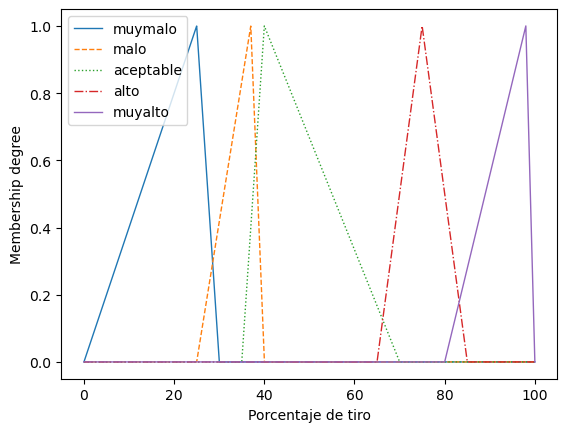

In [8]:
sis_baloncesto.plot_variable("Porcentaje_tiro")

Para la salida, vamos a considerar tres posbilidades, cuyo rango irá de 0 a 100:
- Malo
- Regular
- Bueno

In [9]:
if inference_method == 'takagi':
    # Crear funciones de salida
    sis_baloncesto.set_crisp_output_value("malo", 0)
    sis_baloncesto.set_output_function("regular", "Altura*0.2+Porcentaje_tiro*0.5")
    sis_baloncesto.set_output_function("bueno", "Altura*0.1+Porcentaje_tiro*0.75")
elif inference_method == 'mamdani':
    # Crear conjunto difuso de salida
    Pr1 = FuzzySet(function=Triangular_MF(a=0, b=45, c=50), term="malo")
    Pr2 = FuzzySet(function=Trapezoidal_MF(a=45, b=48, c=73, d=75), term="regular")
    Pr3 = FuzzySet(function=Trapezoidal_MF(a=70, b=75, c=100, d=100), term="bueno")
    rango_po = [0,100]
    lv_po = LinguisticVariable([Pr1, Pr2, Pr3], universe_of_discourse=rango_po)
    sis_baloncesto.add_linguistic_variable("Posibilidades", lv_po)    
    sis_baloncesto.plot_variable("Posibilidades")
else:
    print("ERROR: Método de inferencia no definido")

 * Detected Sugeno model type


Creamos una serie de reglas que cubran nuestro espectro lo máximo posible

In [10]:
RULES = []
R1 = "IF ((Porcentaje_tiro IS malo) OR (Porcentaje_tiro IS muymalo)) THEN (Posibilidades IS malo)"
R2 = "IF ((Porcentaje_tiro IS aceptable) OR (Porcentaje_tiro IS alto)) THEN (Posibilidades IS regular)"
R3 = "IF (Altura IS normal) THEN (Posibilidades IS regular)"
R4 = "IF ((Porcentaje_tiro IS muyalto) OR (Porcentaje_tiro IS alto)) THEN (Posibilidades IS bueno)"
R5 = "IF (Altura IS muyalto) THEN (Posibilidades IS bueno)"
RULES.extend([R1,R2, R3, R4])

In [11]:
sis_baloncesto.add_rules(RULES)

In [12]:
#Probamos el resultado con un par de valores
sis_baloncesto.set_variable("Altura", 180)
sis_baloncesto.set_variable("Porcentaje_tiro", 35)
sis_baloncesto.inference()
#print("Altura: 180 y porcentaje de tiro 35. Calidad jugador: {}".format(sis_baloncesto.inference()))

{'Posibilidades': 29.181818181818183}

In [13]:
sis_baloncesto.set_variable("Altura", 170)
sis_baloncesto.set_variable("Porcentaje_tiro", 95)
sis_baloncesto.inference()
#print("Altura: 170 y porcentaje de tiro 95. Calidad jugador: {}".format(sis_baloncesto.inference()))

{'Posibilidades': 88.25}

In [14]:
sis_baloncesto.set_variable("Altura", 210)
sis_baloncesto.set_variable("Porcentaje_tiro", 50)
sis_baloncesto.inference()
#print("Altura: 210 y porcentaje de tiro 50. Calidad jugador: {}".format(sis_baloncesto.inference()))

{'Posibilidades': 67.0}